In [8]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib import rcParams
plt.rcParams["font.family"] = "MS Gothic"

In [2]:
data = pd.read_csv('./data/master_data.csv', encoding='shift-jis')

In [15]:
data.head(5)

,レース日,レース場,レース回,天候,風向,風速(m),波の高さ(cm),1枠_選手名_x,1枠_モーター番号,1枠_順位,...,5枠_全国勝率,5枠_全国2連対率,5枠_当地勝率,5枠_当地2連対率,6枠_年齢,6枠_体重,6枠_全国勝率,6枠_全国2連対率,6枠_当地勝率,6枠_当地2連対率
0,20150701,三国,1,雨,南,3.0,2.0,室田泰史,48.0,1,...,3.61,5.56,0.00,0.00,23,53,2.11,7.89,1.85,0.00
1,20150701,三国,10,曇り,西,2.0,1.0,奥田誠,44.0,2,...,4.85,26.15,4.25,12.50,48,56,4.74,25.86,4.11,22.22
2,20150701,三国,11,曇り,西,2.0,1.0,上村純一,38.0,4,...,4.91,26.83,5.43,38.10,36,50,6.66,53.06,6.47,55.56
3,20150701,三国,12,曇り,西,2.0,1.0,倉谷和信,28.0,1,...,6.30,40.57,6.00,44.44,30,50,7.34,61.60,8.06,76.47
4,20150701,三国,2,雨,南西,2.0,1.0,片岡秀樹,53.0,1,...,2.23,3.23,1.91,0.00,39,47,6.10,47.96,6.13,45.65


In [4]:
data.drop(columns=['タイトル', '日次', '1枠_選手名_y', '2枠_選手名_y', '3枠_選手名_y', '4枠_選手名_y', '5枠_選手名_y','6枠_選手名_y'], inplace=True)


## 各コースごとの順位の関係

In [5]:
rank_data = data[['1枠_順位', '2枠_順位', '3枠_順位', '4枠_順位', '5枠_順位','6枠_順位']]
rank_data.head()

,1枠_順位,2枠_順位,3枠_順位,4枠_順位,5枠_順位,6枠_順位
0,1,2,6,5,3,4
1,2,1,4,3,5,6
2,4,2,6,5,3,1
3,1,3,4,2,6,5
4,1,6,2,3,5,4


C:\Users\kei01\AppData\Local\Temp\ipykernel_4416\1236084526.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  rank_data.hist(ax=ax, bins=11)


array([[<AxesSubplot:title={'center':'1枠_順位'}>,
        <AxesSubplot:title={'center':'2枠_順位'}>],
       [<AxesSubplot:title={'center':'3枠_順位'}>,
        <AxesSubplot:title={'center':'4枠_順位'}>],
       [<AxesSubplot:title={'center':'5枠_順位'}>,
        <AxesSubplot:title={'center':'6枠_順位'}>]], dtype=object)

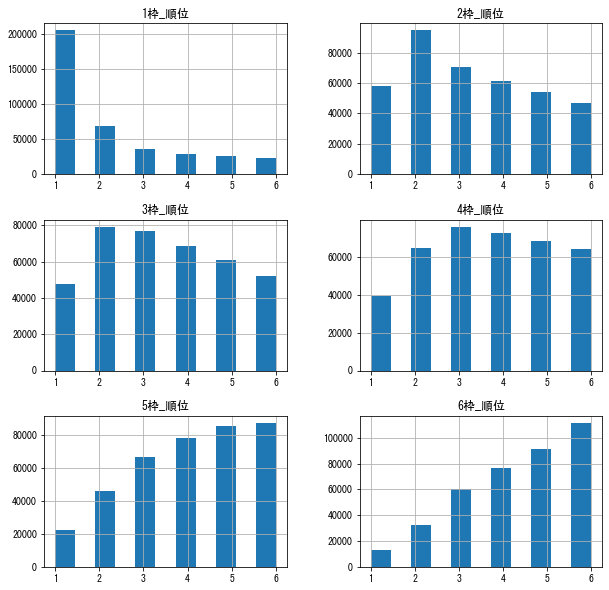

In [16]:
fig, ax = plt.subplots(figsize=(10,10))

rank_data.hist(ax=ax, bins=11)

## 年齢による順位の相関関係(2021年のデータを使用)

In [49]:
data2021 = data.query('20210101<=レース日<=20211231')

age1 = data2021[['1枠_順位', '1枠_年齢']]
age1.columns = ['順位', '年齢']
age2 = data2021[['2枠_順位', '2枠_年齢']]
age2.columns = ['順位', '年齢']
age3 = data2021[['3枠_順位', '3枠_年齢']]
age3.columns = ['順位', '年齢']
age4 = data2021[['4枠_順位', '4枠_年齢']]
age4.columns = ['順位', '年齢']
age5 = data2021[['5枠_順位', '5枠_年齢']]
age5.columns = ['順位', '年齢']
age6 = data2021[['6枠_順位', '6枠_年齢']]
age6.columns = ['順位', '年齢']
age_data = pd.concat([age1, age2, age3, age4, age5, age6])
print(len(age_data))
age_data.head()

328554


,順位,年齢
298562,2,41
298563,1,44
298564,1,37
298565,5,41
298566,4,53


### 人口割合

2021年度の平均年齢:38.36749818903437, 2021年度の年齢の中央値:38.0


Text(40.28587309848609, 14959.5075, 'Mean: 38.37')

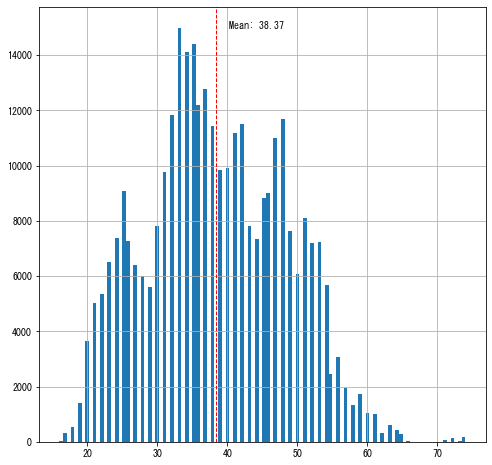

In [66]:
fig, ax = plt.subplots(figsize=(8,8))
mean_age = age_data['年齢'].mean()
median_age = age_data['年齢'].median()
print('2021年度の平均年齢:{}, 2021年度の年齢の中央値:{}'.format(mean_age, median_age))
age_data['年齢'].hist(ax=ax, bins=110)
plt.axvline(mean_age, color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mean_age*1.05, max_ylim*0.95, 'Mean: {:.2f}'.format(mean_age))

In [51]:
data1 = age_data.query('順位==1')
data2 = age_data.query('順位==2')
data3 = age_data.query('順位==3')
data4 = age_data.query('順位==4')
data5 = age_data.query('順位==5')
data6 = age_data.query('順位==6')

<AxesSubplot:>

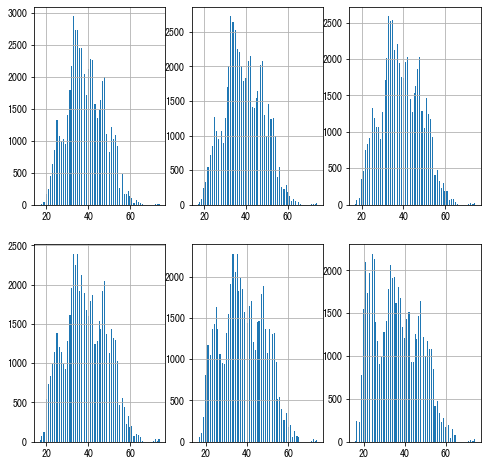

In [68]:
#fig, ax = plt.subplots(figsize=(10,10))
#data1['年齢'].hist(ax=ax, bins=110)

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)
data1['年齢'].hist(ax=ax1, bins=110)
data2['年齢'].hist(ax=ax2, bins=110)
data3['年齢'].hist(ax=ax3, bins=110)
data4['年齢'].hist(ax=ax4, bins=110)
data5['年齢'].hist(ax=ax5, bins=110)
data6['年齢'].hist(ax=ax6, bins=110)

In [8]:
print(data['3枠_選手名_x'].value_counts(ascending=True))

大原祥昌       1
寺田空詩       1
石原凪紗       1
大屋賢司       1
仲道大輔       1
        ... 
谷村一哉     366
中嶋誠一郎    368
堤昇       370
平田さやか    374
川上剛      382
Name: 3枠_選手名_x, Length: 1874, dtype: int64


In [14]:
data_player1 = data['1枠_選手名_x'].value_counts(ascending=False)
data_player2 = data['2枠_選手名_x'].value_counts(ascending=False)
data_player3 = data['3枠_選手名_x'].value_counts(ascending=False)
data_player4 = data['4枠_選手名_x'].value_counts(ascending=False)
data_player5 = data['5枠_選手名_x'].value_counts(ascending=False)

In [17]:
data_player2.head(100)

岡瀬正人    392
小畑実成    389
山崎義明    381
川上剛     379
平石和男    374
       ... 
秋山広一    330
中澤和志    330
石田章央    329
高濱芳久    329
羽野直也    329
Name: 2枠_選手名_x, Length: 100, dtype: int64

In [16]:
type(data_player1)

pandas.core.series.Series